In [1]:
from impedance import preprocessing
from impedance.models.circuits import CustomCircuit
from impedance.models.circuits.fitting import extract_circuit_elements
from impedance.visualization import plot_nyquist,plot_residuals
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [9,6] # size of the plot; use 3t:2t ratio; recommended 9:6 or 15:10
plt.rcParams['figure.dpi'] = 300 # quality of the plot; use 300 for debugging, 1000+ for quality
plt.rcParams['axes.titlesize'] = 22 # fontsize of the title
plt.rcParams['axes.labelsize'] = 18 # fontsize of the x- and y-axis labels
plt.rcParams['xtick.labelsize'] = 14 # fontsize of the x-axis
plt.rcParams['ytick.labelsize'] = 14 # fontsize of the y-axis
plt.rcParams['legend.markerscale'] = 0.5 # legend marker size
plt.rcParams['lines.markersize'] = 5 # marker size
plt.rcParams['lines.linestyle'] = '--' # line in between points; use 'None' or '--' (dashed)
plt.rcParams['lines.linewidth'] = 1 # width of line between points, if any
plt.rcParams['axes.titlepad'] = 15 # distance between plot area and title
plt.rcParams['axes.labelpad'] = 10 # distance between plot area and title
plt.rcParams['font.family'] = 'Helvetica' # font of plot text
plt.rcParams['axes.linewidth'] = 2 # thickness of plot border
plt.rcParams['xtick.major.size'] = 10  # length of major ticks on x-axis
plt.rcParams['xtick.minor.size'] = 3  # length of minor ticks on x-axis
plt.rcParams['ytick.major.size'] = 10  # length of major ticks on y-axis
plt.rcParams['ytick.minor.size'] = 3  # length of minor ticks on y-axis


The circuit parameters are:  
Circuit string: R_0-L_0-p(R_1,C_1)-p(R_2,C_2-W_2)
Fit: True

Initial guesses:
    R_0 = 1.00e+00 [Ohm]
    L_0 = 1.00e+00 [H]
    R_1 = 1.00e+00 [Ohm]
    C_1 = 1.00e+00 [F]
    R_2 = 1.00e+00 [Ohm]
    C_2 = 1.00e+00 [F]
    W_2 = 1.00e+00 [Ohm sec^-1/2]

Fit parameters:
    R_0 = 5.64e+00  (+/- 2.70e+01) [Ohm]
    L_0 = 4.60e-06  (+/- 9.28e-06) [H]
    R_1 = 6.88e+01  (+/- 7.48e+01) [Ohm]
    C_1 = 1.36e-04  (+/- 2.71e-04) [F]
    R_2 = 1.44e+02  (+/- 7.61e+01) [Ohm]
    C_2 = 2.28e+04  (+/- 0.00e+00) [F]
    W_2 = 6.64e+03  (+/- 7.12e+03) [Ohm sec^-1/2]



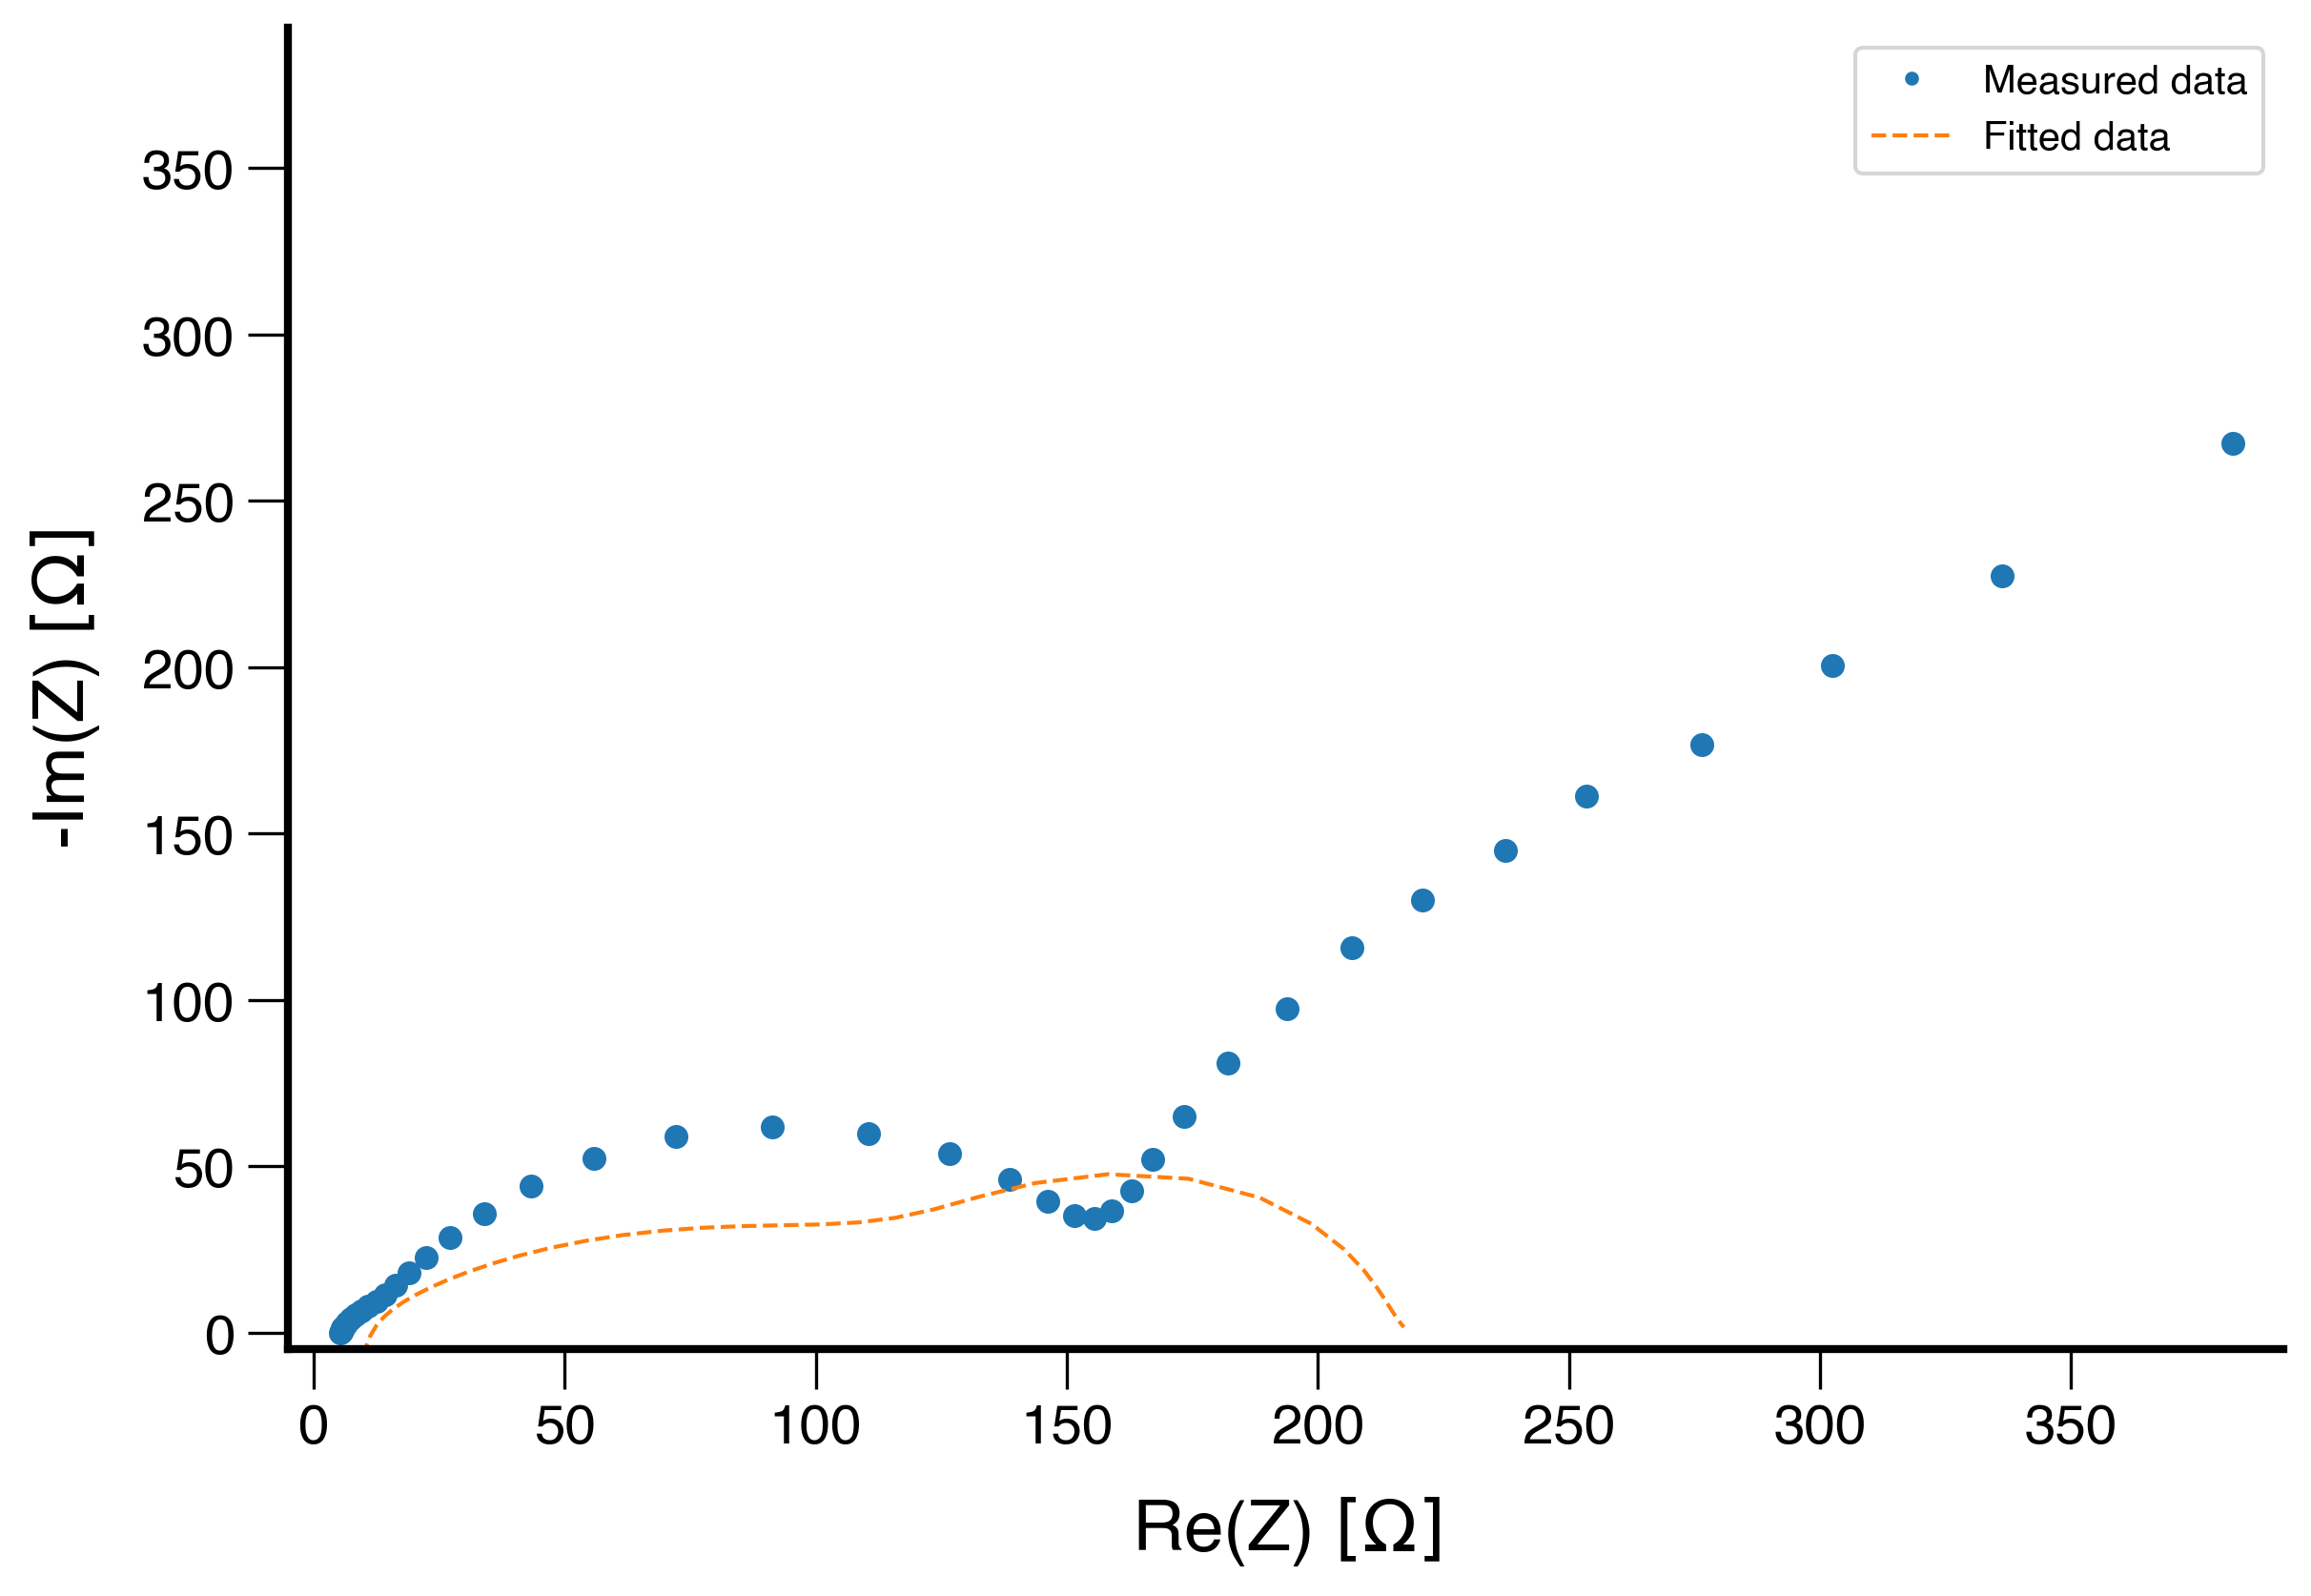

In [2]:
path = r'/Users/amrtayamen/Library/CloudStorage/OneDrive-DrexelUniversity/Andre Tayamen/Data/BioLogic/EIS Data/AT_SB/AT_SB_008_01_S1_GEIS_1MHz_100mHz_Ia-1mA_C01.txt'
data = np.genfromtxt(path, skip_header=1)

Z = data[:,0] + data[:,1] * 1j
# Z = Z[data[:,1] > 0]

frequencies = data[:,2]
# frequencies = frequencies[data[:,1] > 0]

# circuit = 'R_0-p(R_1,C_0)-p(R_2-Wo_1,C_1)'
circuit = 'R_0-L_0-p(R_1,C_1)-p(R_2,C_2-W_2)' 

#The initial guesses are used for the regression model. 
initial_guess = [1, 1, 1, 1, 1, 1, 1]

circuit = CustomCircuit(circuit, initial_guess=initial_guess)
circuit.fit(frequencies, Z)
print('The circuit parameters are: ', circuit)

Z_fit = circuit.predict(frequencies)

fig, ax = plt.subplots()
ax.spines[['top','right']].set_visible(False)

ax.plot(Z.real, Z.imag, 'o', label='Measured data')
ax.plot(Z_fit.real, -Z_fit.imag, label='Fitted data')
ax.set_xlabel(r"Re(Z) $[\Omega]$")
ax.set_ylabel(r"-Im(Z) $[\Omega]$")
ax.set_xlim([-5, max(Z.real)+10])
ax.set_ylim([-5, max(Z.real)+10])
ax.legend(loc='best')
plt.show()